In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

In [9]:
def mode_ties(s):
    m = s.mode()
    if len(m) > 1:
        random.shuffle(m)
        return(m[0])
    return m

def get_mv(task, noise_level):
    df_answer = pd.read_csv('data/noise/answer_' + task + '_noise' + str(noise_level) + '.csv')
    df_answer = df_answer[['question', 'answer']].groupby('question').agg(mode_ties)

    df_truth = pd.read_csv('data/same-index-separate/truth_' + task + '.csv')
    df_truth = df_truth.set_index('question')

    df_full = df_answer.join(df_truth, on='question', how='inner')
    acc = accuracy_score(df_full['answer'], df_full['truth'])
    return(acc)

In [10]:
print(get_mv('dog', 0.45))

0.6914498141263941


In [11]:
def get_ds(task):
    df_ds = pd.read_csv('DawidSkene/results/results-noise/DS/results_noise_' + task + '.csv')[['noise_level', 'accuracy']]
    return df_ds

# def get_mace(task):
#     df_mace = pd.read_csv('MACE/results/scores/results_supervised_' + task + '.csv')[['level', 'accuracy']]
#     df_mace.columns = ['supervision_level', 'mace']
#     df_mace = df_mace.groupby('supervision_level').mean()
#     return df_mace

In [12]:
print(get_ds('dog'))

   noise_level  accuracy
0         0.35  0.526642
1         0.45  0.732342
2         0.55  0.961586
3         0.65  0.965304
4         0.75  0.995043
5         0.85  1.000000
6         0.95  1.000000


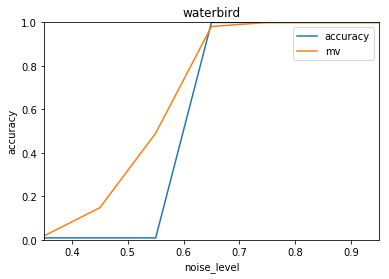

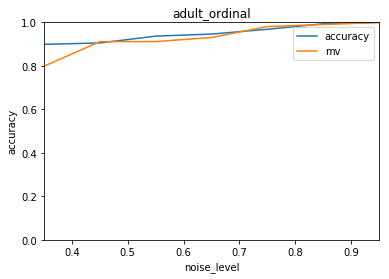

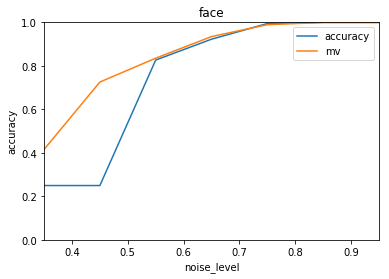

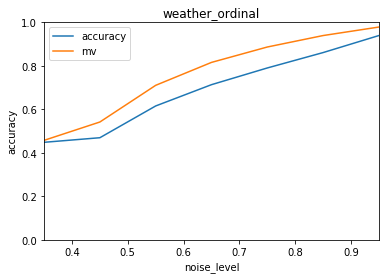

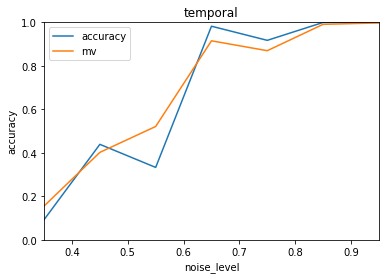

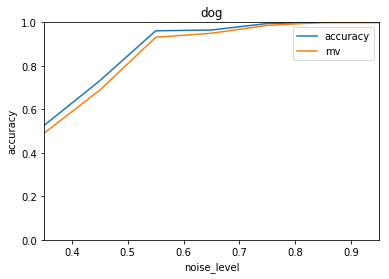

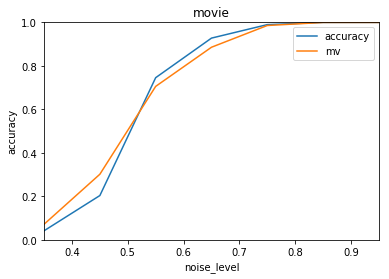

In [19]:
tasks = ['waterbird', 'adult_ordinal', 'face', 'weather_ordinal', 'temporal', 'dog', 'movie']

for task in tasks:
    df_ds = get_ds(task)
#     df_mace = get_mace(task)
#     df = df_ds.join(df_mace, how='inner')

    df_ds['mv'] = df_ds['noise_level'].map(lambda x: get_mv(task, x))
    df_ds = df_ds.set_index('noise_level')
#     print(df_ds)

#     df.index = df_ds.index.astype(str)
    ax = df_ds.plot.line(title=task)
    ax.set_ylabel('accuracy')
    ax.set_ylim(0,1)